# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

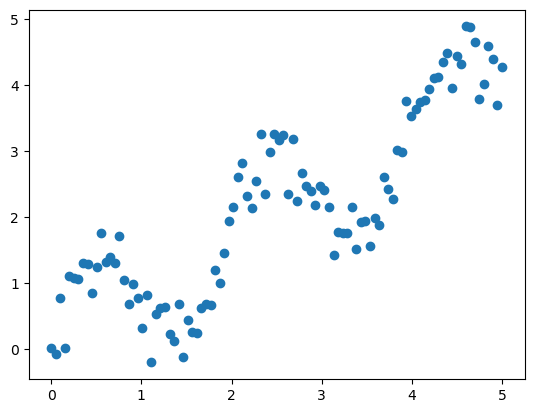

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.5238777742189498


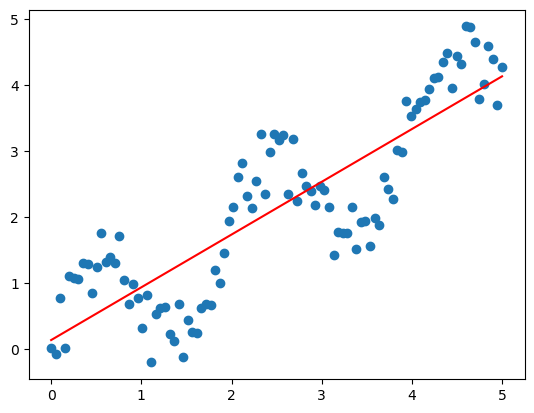

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape)

(100,)


In [9]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [10]:
regr_poly = LinearRegression()

In [12]:
regr_poly.fit(X_poly, y)

LinearRegression()

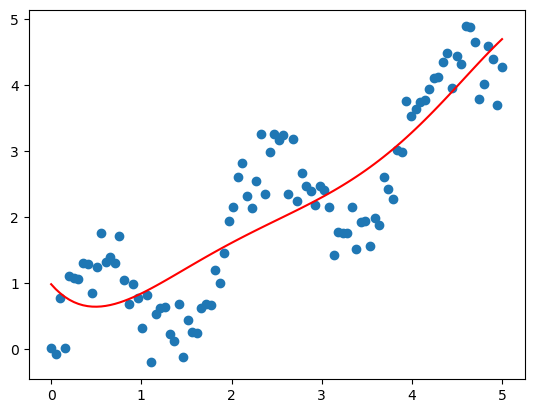

In [13]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [14]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-1.57536493  2.22480701 -0.96480154  0.18867669 -0.01323367]
interception:  0.9832278457379715


In [15]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([0.98322785, 0.90921584, 0.84582504, 0.79235323, 0.74812663,
       0.71249933, 0.68485283, 0.66459545, 0.65116187, 0.64401255,
       0.64263326, 0.64653454, 0.65525115, 0.66834158, 0.68538755,
       0.70599341, 0.7297857 , 0.7564126 , 0.78554336, 0.81686788,
       0.85009608, 0.88495746, 0.92120052, 0.95859229, 0.99691776,
       1.03597939, 1.07559658, 1.11560514, 1.15585679, 1.19621859,
       1.2365725 , 1.27681475, 1.31685544, 1.3566179 , 1.39603826,
       1.43506487, 1.47365782, 1.51178839, 1.54943852, 1.58660033,
       1.62327555, 1.65947505, 1.69521825, 1.73053267, 1.76545337,
       1.80002241, 1.83428837, 1.86830582, 1.90213476, 1.93584016,
       1.96949137, 2.00316166, 2.03692765, 2.07086883, 2.10506699,
       2.13960574, 2.17456998, 2.21004537, 2.24611779, 2.28287286,
       2.32039538, 2.35876884, 2.39807487, 2.43839273, 2.47979879,
       2.52236602, 2.56616344, 2.61125561, 2.65770212, 2.70555707,
       2.7548685 , 2.80567795, 2.85801987, 2.91192113, 2.96740

In [16]:
regr_poly.predict(X_poly)

array([0.98322785, 0.90921584, 0.84582504, 0.79235323, 0.74812663,
       0.71249933, 0.68485283, 0.66459545, 0.65116187, 0.64401255,
       0.64263326, 0.64653454, 0.65525115, 0.66834158, 0.68538755,
       0.70599341, 0.7297857 , 0.7564126 , 0.78554336, 0.81686788,
       0.85009608, 0.88495746, 0.92120052, 0.95859229, 0.99691776,
       1.03597939, 1.07559658, 1.11560514, 1.15585679, 1.19621859,
       1.2365725 , 1.27681475, 1.31685544, 1.3566179 , 1.39603826,
       1.43506487, 1.47365782, 1.51178839, 1.54943852, 1.58660033,
       1.62327555, 1.65947505, 1.69521825, 1.73053267, 1.76545337,
       1.80002241, 1.83428837, 1.86830582, 1.90213476, 1.93584016,
       1.96949137, 2.00316166, 2.03692765, 2.07086883, 2.10506699,
       2.13960574, 2.17456998, 2.21004537, 2.24611779, 2.28287286,
       2.32039538, 2.35876884, 2.39807487, 2.43839273, 2.47979879,
       2.52236602, 2.56616344, 2.61125561, 2.65770212, 2.70555707,
       2.7548685 , 2.80567795, 2.85801987, 2.91192113, 2.96740

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [17]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [18]:
sigma = 0.3

In [19]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [20]:
regr_rbf = LinearRegression()

In [21]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

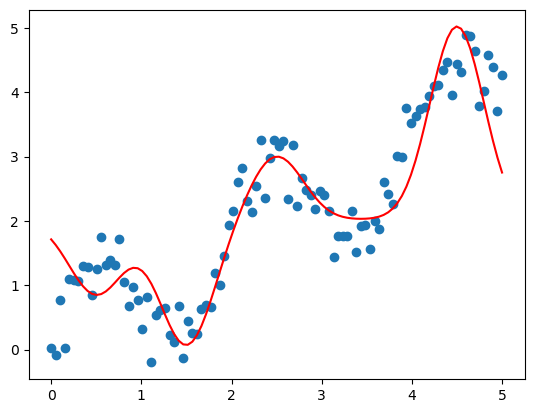

In [22]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [23]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-1.1415145  -1.92804473  1.00989504  0.02202258  3.02701075]
interception:  1.9979801641484782


#### Comparison

In [24]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

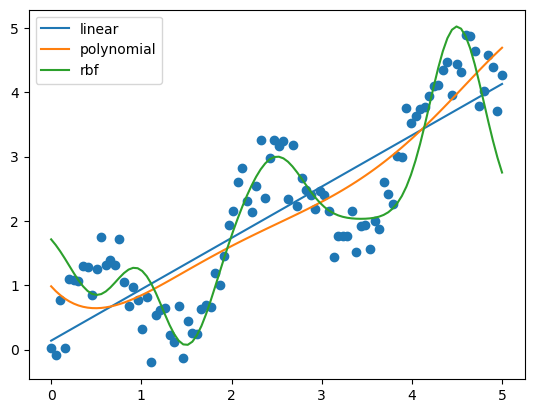

In [25]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [26]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5238777742189498


In [27]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.46092411611959244


In [28]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.29995887366988416
